In [2]:
import tensorflow as tf
import numpy as np
import os

data_folder = 'data/'

print(os.listdir(data_folder))

['t10k-labels-idx1-ubyte', 'train-labels-idx1-ubyte', '.ipynb_checkpoints', 't10k-images-idx3-ubyte', 'train-images-idx3-ubyte', 'mnist.pkl']


## Vom Internet geklaut und angepasst

In [4]:
import os
import struct
import numpy as np
%matplotlib inline


def read(dataset, path):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """
    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError#, "dataset must be 'testing' or 'training'"

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)
        
        
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()
    
    
def ascii_show(image):
    for y in image:
        row = ""
        for x in y:
            row += '{0: <4}'.format(x)
        print(row)

## Visualisierung

60000 <class 'list'> <class 'tuple'>
shape of training data: <class 'tuple'> Lengh of tuple: 2
label:  8
type of pixels: <class 'numpy.ndarray'> 
shape: (28, 28)


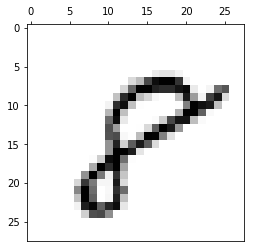

In [5]:
training_data = list(read(dataset='training', path='data/'))
print(len(training_data), type(training_data), type(training_data[0]))

# choose a data from training datasets between 0 to 59999
index = 59999

label, pixels = training_data[index]
print("shape of training data: %s Lengh of tuple: %s" %(type(training_data[index]), len(training_data[index])))

print("label: ", label)
print("type of pixels: %s \nshape: %s" % (type(pixels), pixels.shape))
#print(pixels)
show(pixels)

## Bessere Darstellung in ndarray

In [6]:
print("Shape of image: %s \nType of image data: %s \n" %(pixels.shape, type(pixels)))
ascii_show(pixels)


Shape of image: (28, 28) 
Type of image data: <class 'numpy.ndarray'> 

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   38  48  48  22  0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   62  97  198 243 254 254 212 27  0   0   0   0   0   0   0   
0   0   0   0   0   0   